In [241]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [242]:
filepath = os.path.join('data', 'employment_statistics', '001_115e_2021_20230716-132338.csv')
employment_df = pd.read_csv(filepath)
display(employment_df)

,Main type of activity,Nationality,Occupational status,Sex,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Total,Finland,Wage and salary earners,Total,1927810,1938660,1947687,1952946,1968434,1986156,...,2000812,1963127,1937215,1923558,1935920,1988019,2018192,2004549,1918342,1988895
1,Total,Finland,Entrepreneurs,Total,241110,238548,235679,233461,231938,232593,...,238930,234952,229471,223293,225213,218695,225588,226099,223259,226073
2,Total,Finland,Not employed,Total,1035231,1035224,1034826,1033750,1020077,1007238,...,937180,957543,966378,964849,930779,866957,811422,807158,879515,789261
3,Total,"FOREIGN COUNTRIES, TOTAL",Wage and salary earners,Total,24792,27544,29468,30499,32050,35505,...,69318,71342,73685,75962,80146,86164,93144,98181,94490,110360
4,Total,"FOREIGN COUNTRIES, TOTAL",Entrepreneurs,Total,2425,2720,2976,3171,3325,3669,...,7709,8004,8131,8438,9214,9519,10868,12109,13104,14858
5,Total,"FOREIGN COUNTRIES, TOTAL",Not employed,Total,37190,40055,42033,43998,44079,45556,...,75802,83075,89993,95045,100145,98197,95777,96865,107619,104241
6,Employed,Finland,Wage and salary earners,Total,1927810,1938660,1947687,1952946,1968434,1986156,...,2000812,1963127,1937215,1923558,1935920,1988019,2018192,2004549,1918342,1988895
7,Employed,Finland,Entrepreneurs,Total,241110,238548,235679,233461,231938,232593,...,238930,234952,229471,223293,225213,218695,225588,226099,223259,226073
8,Employed,"FOREIGN COUNTRIES, TOTAL",Wage and salary earners,Total,24792,27544,29468,30499,32050,35505,...,69318,71342,73685,75962,80146,86164,93144,98181,94490,110360
9,Employed,"FOREIGN COUNTRIES, TOTAL",Entrepreneurs,Total,2425,2720,2976,3171,3325,3669,...,7709,8004,8131,8438,9214,9519,10868,12109,13104,14858


In [243]:
entrepreneur_df = employment_df.loc[employment_df['Main type of activity']=='Total'].copy(deep=True)
entrepreneur_df['type'] = entrepreneur_df['Occupational status'] + '/' + entrepreneur_df['Nationality']
entrepreneur_df = entrepreneur_df.drop(columns=['Main type of activity', 'Sex', 'Nationality', 'Occupational status'])
df_melt= pd.melt(entrepreneur_df, id_vars='type', var_name='year', value_name='number')
df_melt[['type', 'Nationality']] = df_melt['type'].str.split("/", expand = True)
df_melt = df_melt[['Nationality', 'type', 'year', 'number']]
df_melt = df_melt.loc[df_melt['type'] != 'Not employed']
display(df_melt)

,Nationality,type,year,number
0,Finland,Wage and salary earners,2000,1927810
1,Finland,Entrepreneurs,2000,241110
3,"FOREIGN COUNTRIES, TOTAL",Wage and salary earners,2000,24792
4,"FOREIGN COUNTRIES, TOTAL",Entrepreneurs,2000,2425
6,Finland,Wage and salary earners,2001,1938660
...,...,...,...,...
124,"FOREIGN COUNTRIES, TOTAL",Entrepreneurs,2020,13104
126,Finland,Wage and salary earners,2021,1988895
127,Finland,Entrepreneurs,2021,226073
129,"FOREIGN COUNTRIES, TOTAL",Wage and salary earners,2021,110360


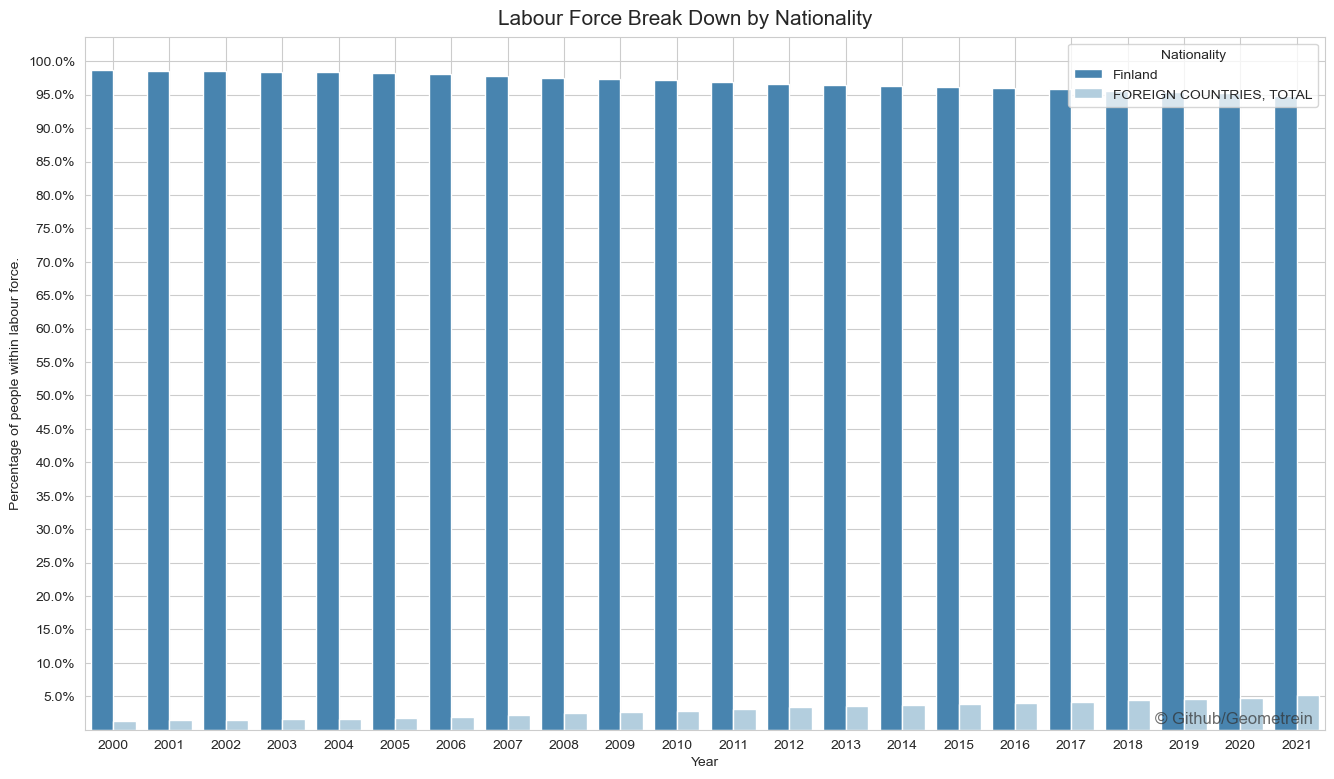

In [244]:
def plot_wage_earners_breakdown(input_df: pd.DataFrame) -> None:
    # Data
    grouped_employment = input_df.copy(deep=True)
    grouped_employment = grouped_employment[grouped_employment['type']=='Wage and salary earners']
    grouped_employment['normalized_values'] = grouped_employment.groupby(['year'])['number'].transform(lambda x: (x * 100 / x.sum()))
    # Figure
    fig, ax = plt.subplots(figsize=(16, 9), facecolor='w')
    sns.barplot(data=grouped_employment, x="year", y="normalized_values", hue='Nationality', palette='Blues_r', errorbar=None, ax=ax)
    # Labels
    plt.suptitle(f"Labour Force Break Down by Nationality", y=0.91, fontsize=15)
    ax.set(xlabel='Year', ylabel=f'Percentage of people within labour force.')
    ax.set_yticks(range(5, 105, 5))
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
    ax.grid(axis='x')
    # Author
    ax.text(x=0.99, y=0.005, s='© Github/Geometrein', va='bottom', ha='right',
        transform=ax.transAxes, color='#303030', fontsize=12, alpha=0.7
    )
    plt.show()


plot_wage_earners_breakdown(input_df=df_melt)

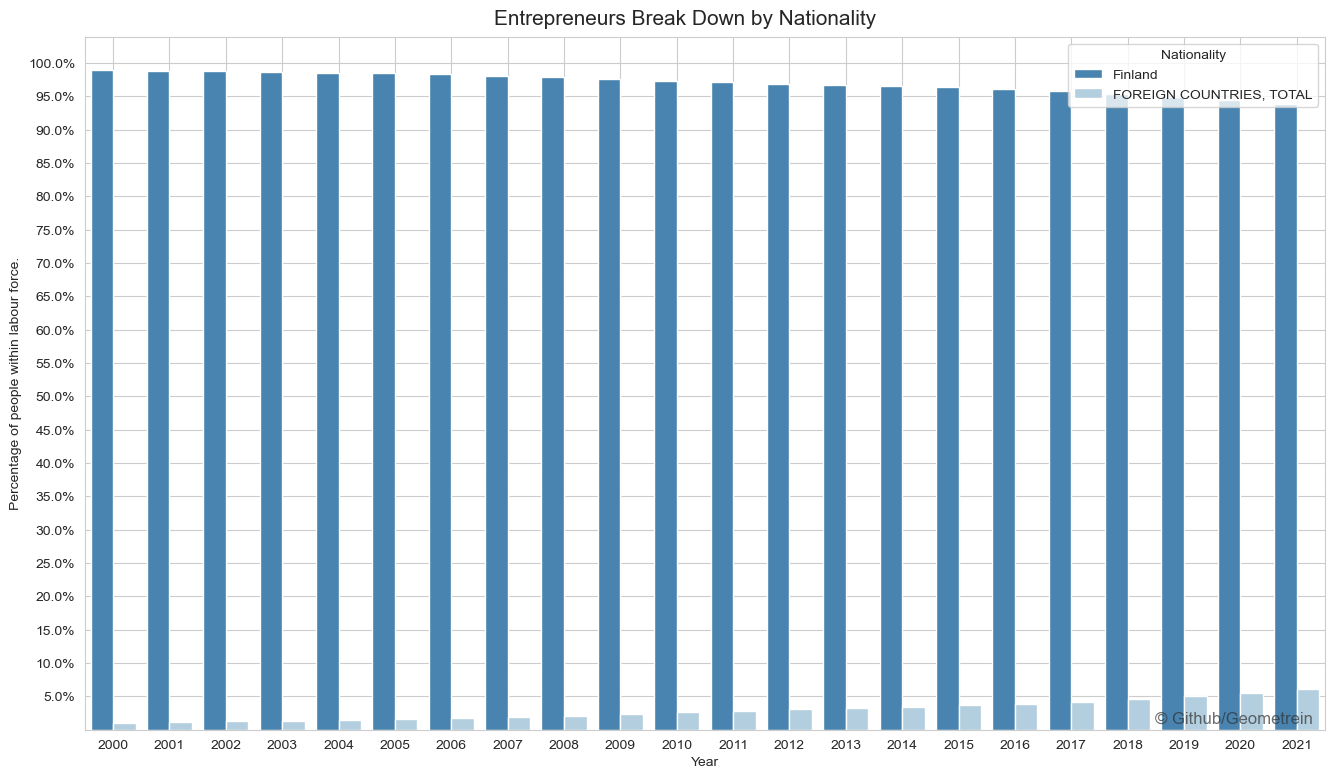

In [245]:
def plot_entrepreneur_breakdown(input_df: pd.DataFrame) -> None:
    # Data
    grouped_employment = input_df.copy(deep=True)
    grouped_employment = grouped_employment[grouped_employment['type']=='Entrepreneurs']
    grouped_employment['normalized_values'] = grouped_employment.groupby(['year'])['number'].transform(lambda x: (x * 100 / x.sum()))
    # Figure
    fig, ax = plt.subplots(figsize=(16, 9), facecolor='w')
    sns.barplot(data=grouped_employment, x="year", y="normalized_values", hue='Nationality', palette='Blues_r', errorbar=None, ax=ax)
    # Labels
    plt.suptitle(f"Entrepreneurs Break Down by Nationality", y=0.91, fontsize=15)
    ax.set(xlabel='Year', ylabel=f'Percentage of people within labour force.')
    ax.set_yticks(range(5, 105, 5))
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
    ax.grid(axis='x')
    # Author
    ax.text(x=0.99, y=0.005, s='© Github/Geometrein', va='bottom', ha='right',
        transform=ax.transAxes, color='#303030', fontsize=12, alpha=0.7
    )
    plt.show()

plot_entrepreneur_breakdown(input_df=df_melt)

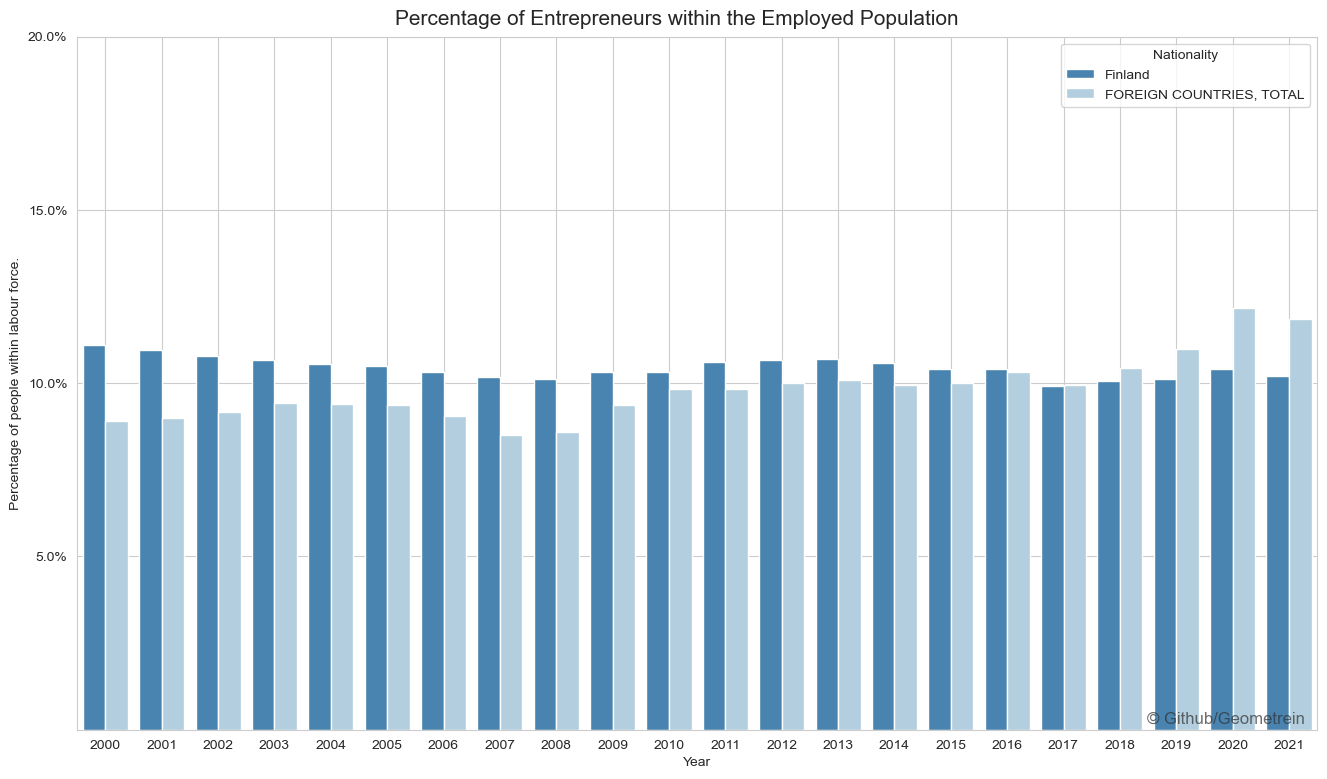

In [246]:
def plot_entrepreneur_ratio(input_df: pd.DataFrame) -> None:
    # Data
    grouped_employment = input_df.copy(deep=True)
    grouped_employment['total_workers'] = grouped_employment.groupby(['year', 'Nationality'])['number'].transform(lambda x: x.sum())
    grouped_employment['ratio'] = (grouped_employment['number'] / grouped_employment['total_workers']) * 100
    grouped_employment = grouped_employment[grouped_employment['type']=='Entrepreneurs']
    #print(grouped_employment)
    grouped_employment['normalized_values'] = grouped_employment.groupby(['year'])['number'].transform(lambda x: (x * 100 / x.sum()))
    # Figure
    fig, ax = plt.subplots(figsize=(16, 9), facecolor='w')
    sns.barplot(data=grouped_employment, x="year", y="ratio", hue='Nationality', palette='Blues_r', errorbar=None, ax=ax)
    # Labels
    plt.suptitle(f"Percentage of Entrepreneurs within the Employed Population", y=0.91, fontsize=15)
    ax.set(xlabel='Year', ylabel=f'Percentage of people within labour force.')
    ax.set_yticks(range(5, 21, 5))
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
    ax.grid(axis='x')
    # Author
    ax.text(x=0.99, y=0.005, s='© Github/Geometrein', va='bottom', ha='right',
        transform=ax.transAxes, color='#303030', fontsize=12, alpha=0.7
    )
    plt.show()

plot_entrepreneur_ratio(input_df=df_melt)